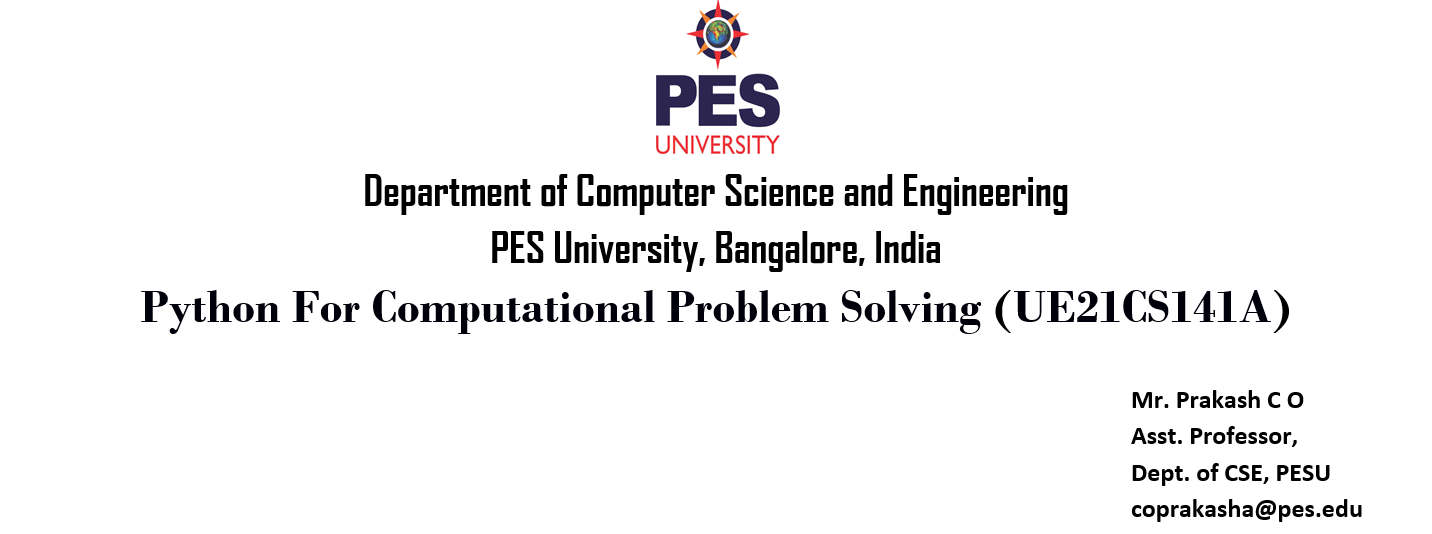

### doctest — Testing through documentation

doctest lets you test your code by running examples embedded in the documentation and verifying that they produce the expected results. It works by parsing the help text to find examples, running them, then comparing the output text against the expected value. 

Many developers find doctest easier than unittest because in its simplest form, there is no API to learn before using it. However, as the examples become more complex the lack of fixture management can make writing doctest tests more cumbersome than using unittest.

The doctest module searches for pieces of text that look like interactive Python sessions, and then executes those sessions to verify that they work exactly as shown. There are several common ways to use doctest:

* To check that a module’s docstrings are up-to-date by verifying that all interactive examples still work as documented.

* To perform regression testing by verifying that interactive examples from a test file or a test object work as expected.

* To write tutorial documentation for a package, liberally illustrated with input-output examples. Depending on whether the examples or the expository text are emphasized, this has the flavor of “literate testing” or “executable documentation”.

Here’s a complete but small example module:

In [2]:
"""
This is the "example" module.
The example module supplies one function, factorial().  For example,
>>> factorial(5)
120
"""

def factorial(n):
    """Return the factorial of n, an exact integer >= 0.

    >>> [factorial(n) for n in range(6)]
    [1, 1, 2, 6, 24, 120]
    >>> factorial(30)
    265252859812191058636308480000000
    >>> factorial(-1)
    Traceback (most recent call last):
        ...
    ValueError: n must be >= 0

    Factorials of floats are OK, but the float must be an exact integer:
    >>> factorial(30.1)
    Traceback (most recent call last):
        ...
    ValueError: n must be exact integer
    >>> factorial(30.0)
    265252859812191058636308480000000

    It must also not be ridiculously large:
    >>> factorial(1e100)
    Traceback (most recent call last):
        ...
    OverflowError: n too large
    """

    import math
    if not n >= 0:
        raise ValueError("n must be >= 0")
    if math.floor(n) != n:
        raise ValueError("n must be exact integer")
    if n+1 == n:  # catch a value like 1e300
        raise OverflowError("n too large")
    result = 1
    factor = 2
    while factor <= n:
        result *= factor
        factor += 1
    return result


if __name__ == "__main__":
    from doctest import testmod
    testmod()

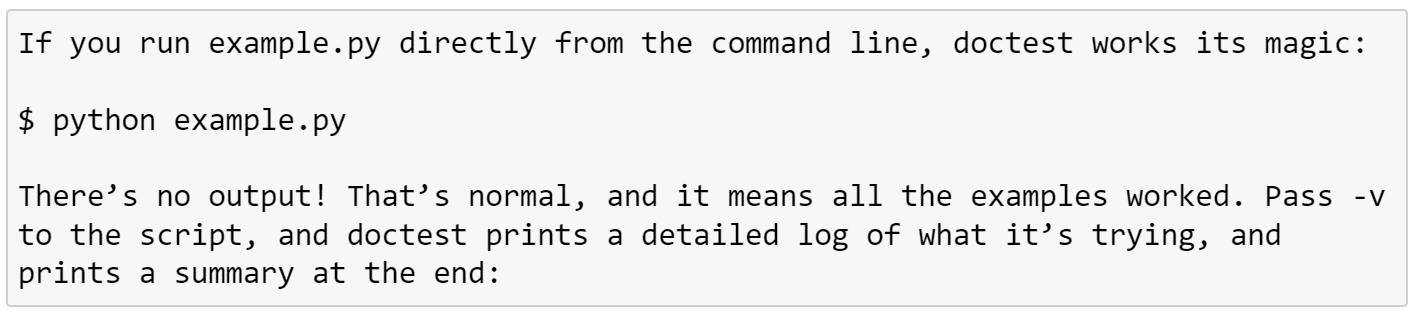

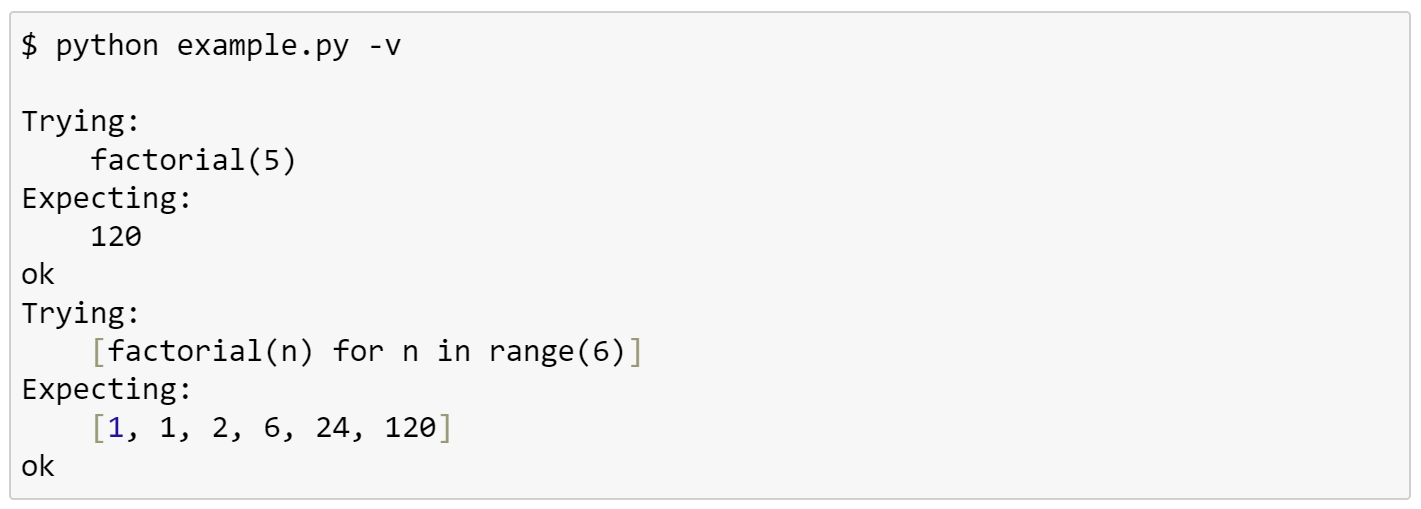

And so on, eventually ending with:

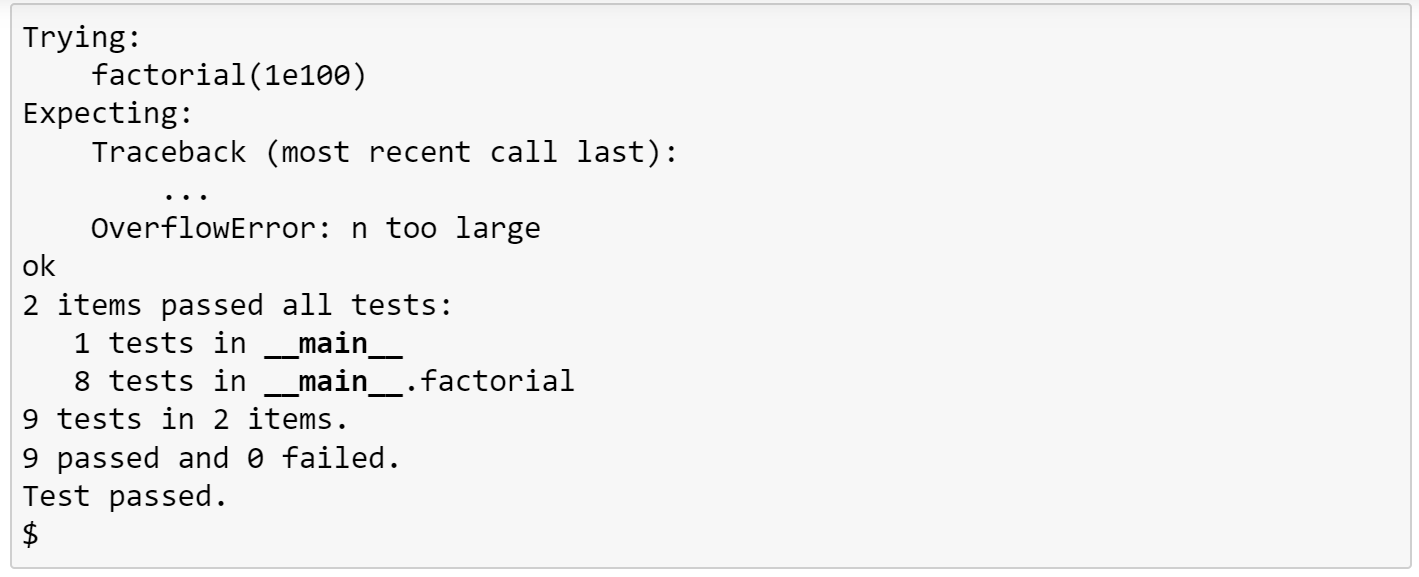

That’s all you need to know to start making productive use of doctest! Jump in. The following sections provide full details. Note that there are many examples of doctests in the standard Python test suite and libraries. Especially useful examples can be found in the standard test file Lib/test/test_doctest.py.

### Python assert Keyword
Assertions in any programming language are the debugging tools that help in the smooth flow of code. Assertions are mainly assumptions that a programmer knows always wants to be true and hence puts them in code so that failure of them doesn’t allow the code to execute further. 

In simpler terms, we can say that assertion is the boolean expression that checks if the statement is True or False. If the statement is true then it does nothing and continues the execution but if the statement is False then it stops the execution of the program and throws an error. Let us look at the flowchart of the assertion.
###### Flowchart of Assertion
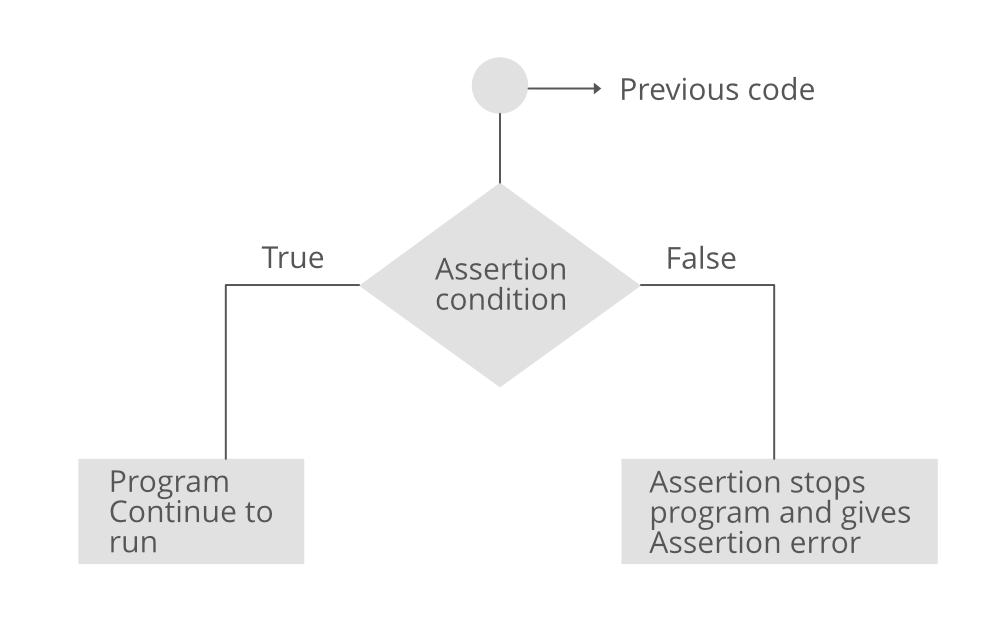

##### Assert Keyword 
In python assert keyword helps in achieving this task. This statement simply takes input a boolean condition, which when returns true doesn’t return anything, but if it is computed to be false, then it raises an AssertionError along with the optional message provided. 

Syntax:
###### assert condition [, Error_Message] 
Parameters: 
* condition: The boolean condition returning true or false. 
* error_message: The optional argument to be printed in console in case of AssertionError

* Returns: Returns AssertionError, in case the condition evaluates to false along with the error message which when provided. 

Example 1:

Test if a condition returns True:

In [3]:
x = "hello"

#if condition returns True, then nothing happens:
assert x == "hello"

#if condition returns False, AssertionError is raised:
assert x == "goodbye", 'Strings are not matching'

AssertionError: Strings are not matching

Example 2: Python assert keyword without error message

In [4]:
# initializing number
a = 4
b = 0
  
# using assert to check for 0
print("The value of a / b is : ")
assert b != 0, 'The value of b is 0'
print(a / b)

The value of a / b is : 


AssertionError: The value of b is 0

Example 3: Python assert keyword with error message

In [9]:
# initializing number
a = 4
b = 0
  
# using assert to check for 0
print("The value of a / b is : ")
assert b != 0, "Zero Division Error"   #Write a message if the condition is False
print(a / b)

The value of a / b is : 


AssertionError: Zero Division Error

###### Practical Application
This has a much greater utility in testing and Quality assurance role in any development domain. Different types of assertions are used depending upon the application. Below is the simpler demonstration of a program that only allows only the batch with all hot food to be dispatched, else rejects the whole batch.

In [7]:
# initializing list of foods temperatures
batch = [ 40, 26, 39, 30, 25, 21]
  
# initializing cut temperature
cut = 26
  
# using assert to check for temperature greater than cut
for i in batch:
    assert i >= 26, "Batch is Rejected"   #Write a message if the condition is False
    print (str(i) + " is O.K" )

40 is O.K
26 is O.K
39 is O.K
30 is O.K


AssertionError: Batch is Rejected

### pytest: helps you write better programs
The pytest framework makes it easy to write small tests, yet scales to support complex functional testing for applications and libraries.

An example of a simple test:

In [ ]:
# content of test_sample.py
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

To execute it:

$ pytest test_sample.py

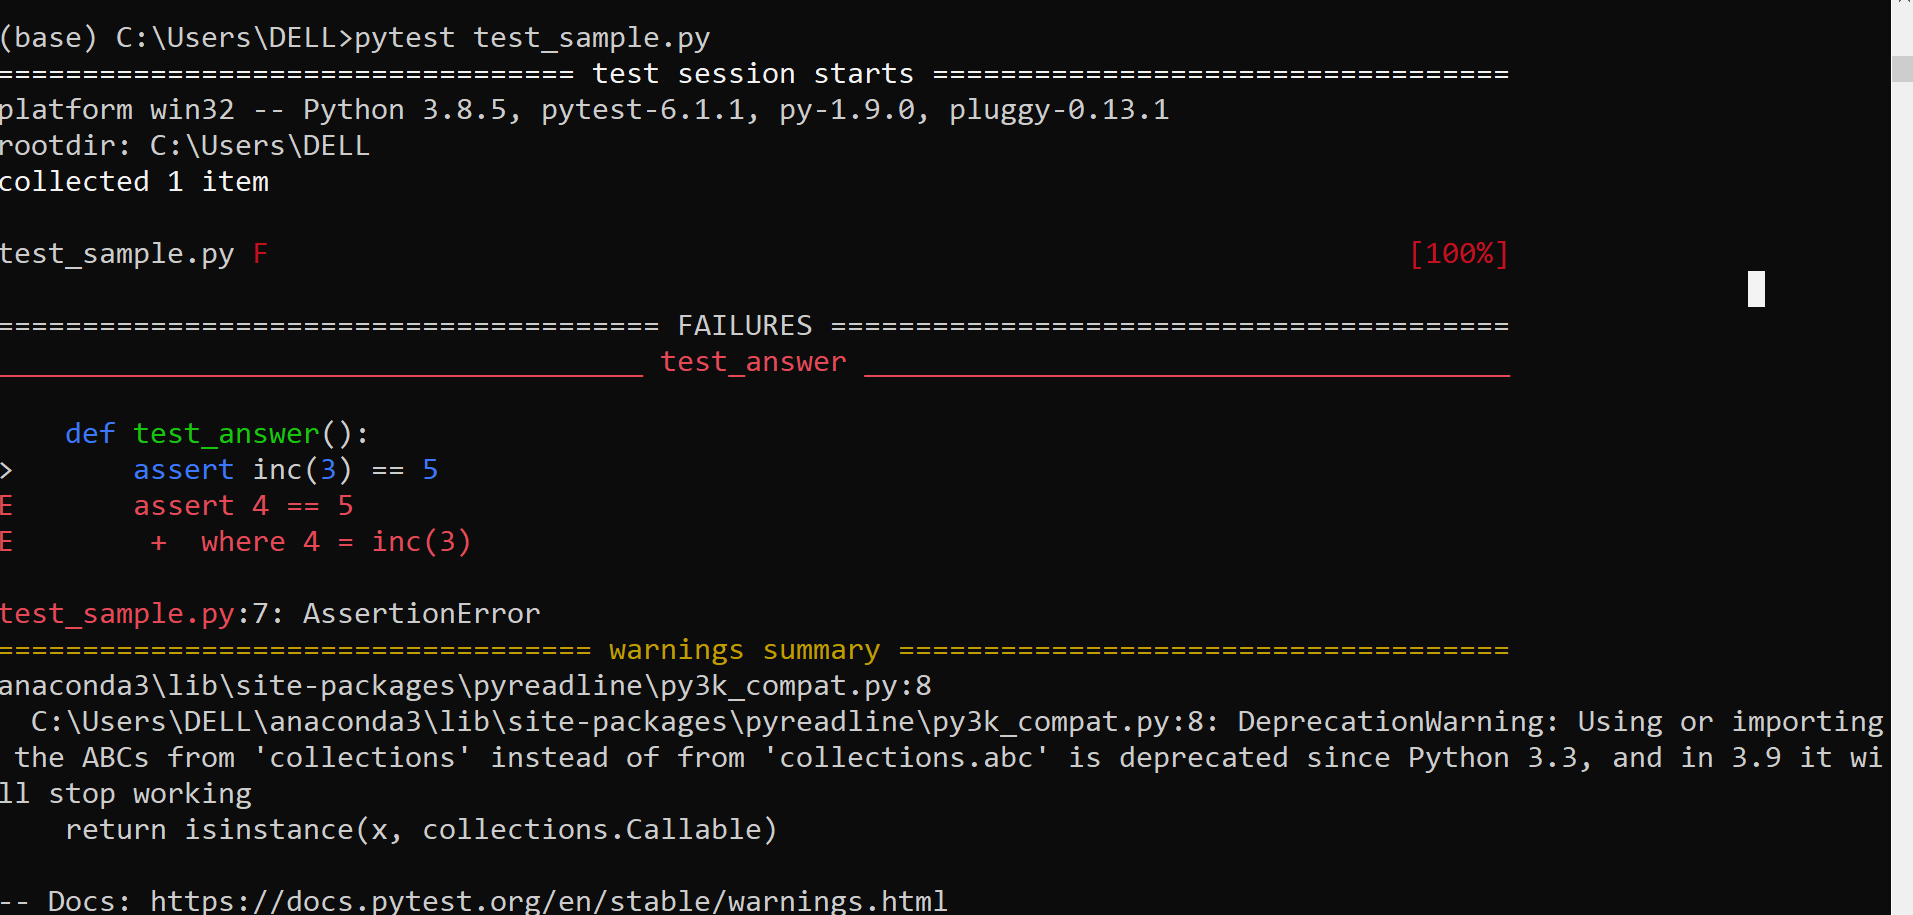
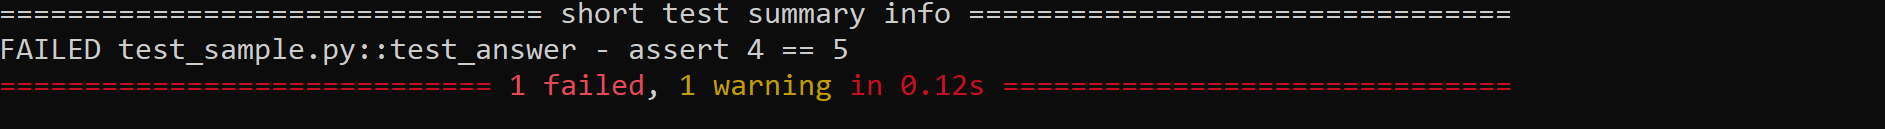

### Python debugging tools
In all programming exercises, it is difficult to go far and deep without a handy debugger. The built-in debugger, pdb, in Python is a mature and capable one that can help us a lot if you know how to use it. 

#### pdb — The Python Debugger

The module pdb defines an interactive source code debugger for Python programs. It supports setting (conditional) breakpoints and single stepping at the source line level, inspection of stack frames, source code listing, and evaluation of arbitrary Python code in the context of any stack frame. It also supports post-mortem debugging and can be called under program control.

The debugger is extensible – it is actually defined as the class Pdb. This is currently undocumented but easily understood by reading the source. The extension interface uses the modules bdb and cmd.

The debugger’s prompt is (Pdb). 

##### The concept of running a debugger
The purpose of a debugger is to provide you a slow motion button to control the flow of a program. It also allow you to freeze the program at certain point of time and examine the state.

The simplest operation under a debugger is to step through the code. That is to run one line of code at a time and wait for your acknowledgment before proceeding into next. The reason we want to run the program in a stop-and-go fashion is to allow us to check the logic and value or verify the algorithm.

For a larger program, we may not want to step through the code from the beginning as it may take a long time before we reached the line that we are interested in. Therefore, debuggers also provide a breakpoint feature that will kick in when a specific line of code is reached. From that point onward, we can step through it line by line.

##### Walk-through of using a debugger
Let’s see how we can make use of a debugger with an example. 

In [8]:
# Given a list of strings, find their corresponding lengths
# filename: debugging_demo1.py
def what1(x):
    res = []
    for w in x:
        res.append(len(w))
    return res

a = [ 'apple', 'pineapple', 'fig', 'mangoes' ]
b = what1(a)
print(b) 

[5, 9, 3, 7]


Assume this program is saved as debugging_demo1.py, to run this program in command line is simply to enter:

> python debugging_demo1.py

and the solution will be print out to the screen. But if we want to run it with the Python debugger, we enter the following in command line:

> python -m pdb debugging_demo1.py

The -m pdb part is to load the pdb module and let the module to execute the file debugging_demo1.py for you. When you run this command, you will be welcomed with the pdb prompt as follows:

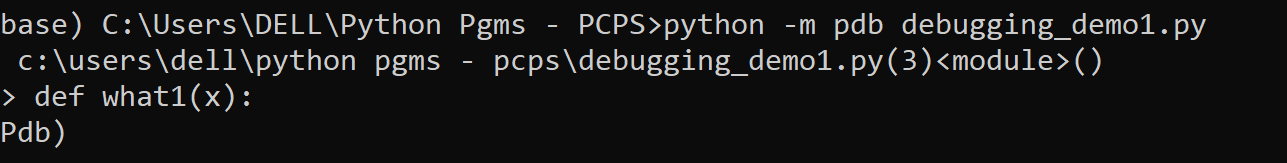

At the beginning of a debugger session, we start with the first line of the program. We can use n to move to the next line, or s to step into a function and h for help:
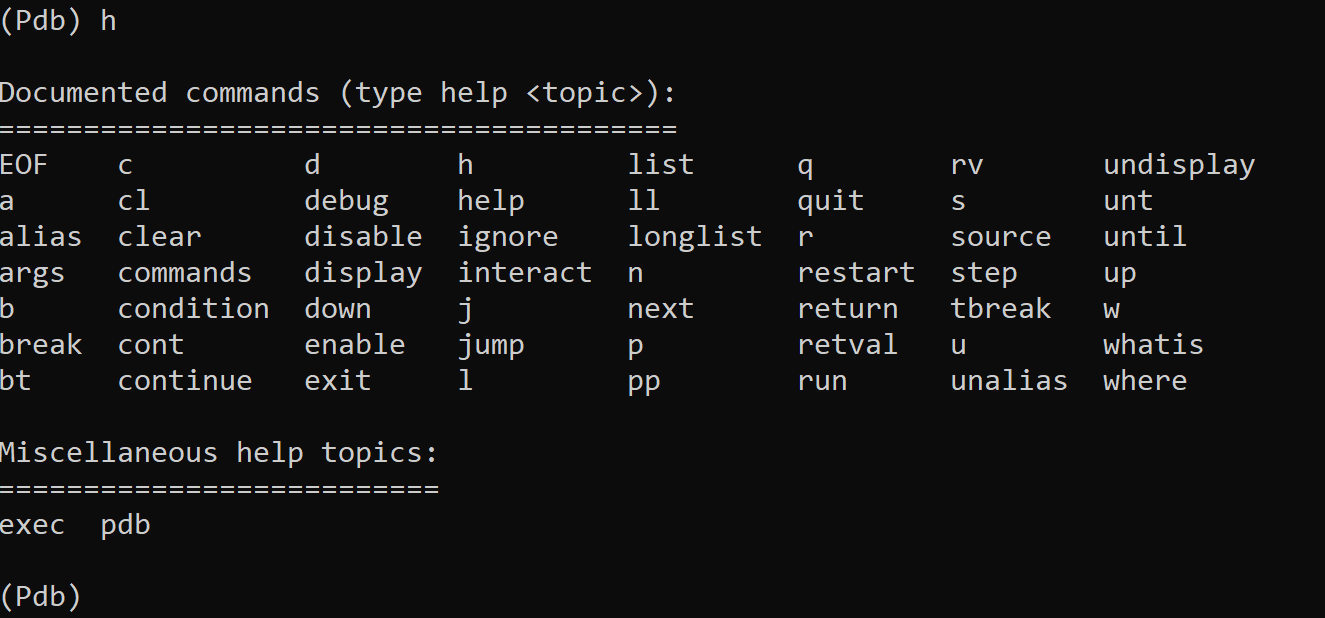

>python -m pdb myscript.py

When invoked as a script, pdb will automatically enter post-mortem debugging if the program being debugged exits abnormally. After post-mortem debugging (or after normal exit of the program), pdb will restart the program. Automatic restarting preserves pdb’s state (such as breakpoints) and in most cases is more useful than quitting the debugger upon program’s exit.

##### The typical usage to break into the debugger is to insert:

>import pdb; pdb.set_trace()

at the location you want to break into the debugger, and then run the program. You can then step through the code following this statement, and continue running without the debugger using the continue command.

New in version 3.7: The built-in breakpoint(), when called with defaults, can be used instead of import pdb; pdb.set_trace().

###### The pdb module defines the following functions; each enters the > debugger in a slightly different way:

> pdb.run(statement, globals=None, locals=None)

Execute the statement (given as a string or a code object) under debugger control. The debugger prompt appears before any code is executed; you can set breakpoints and type continue, or you can step through the statement using step or next (all these commands are explained below). The optional globals and locals arguments specify the environment in which the code is executed; by default the dictionary of the module __main__ is used. (See the explanation of the built-in exec() or eval() functions.)

> pdb.runeval(expression, globals=None, locals=None)

Evaluate the expression (given as a string or a code object) under debugger control. When runeval() returns, it returns the value of the expression. Otherwise this function is similar to run().

>pdb.runcall(function, *args, **kwds)

Call the function (a function or method object, not a string) with the given arguments. When runcall() returns, it returns whatever the function call returned. The debugger prompt appears as soon as the function is entered.

>pdb.set_trace(*, header=None)

Enter the debugger at the calling stack frame. This is useful to hard-code a breakpoint at a given point in a program, even if the code is not otherwise being debugged (e.g. when an assertion fails). If given, header is printed to the console just before debugging begins.

Changed in version 3.7: The keyword-only argument header.

>pdb.post_mortem(traceback=None)

Enter post-mortem debugging of the given traceback object. If no traceback is given, it uses the one of the exception that is currently being handled (an exception must be being handled if the default is to be used).

>pdb.pm()

Enter post-mortem debugging of the traceback found in sys.last_traceback.


#### Debugger Commands
* p-To print the varaible value.
* n-Continue execution untill next line is reached.
* l-To list the source code.
* b-List all the breakpoints.
* h-To get the list of available commnads.
* q-To quit the debugger.
* u (up): Allows you to go up one level in the backtrace.
* d (down): Allows you to go down one level in the backtrace. 

References:

1) https://docs.python.org/3/library/doctest.html

2) https://docs.pytest.org/en/6.2.x/

3) https://www.geeksforgeeks.org/python-assert-keyword/

4) https://docs.python.org/3/library/pdb.html
